In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 학습 알고리즘
from sklearn.linear_model import LogisticRegression

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 회귀
- mean_squared_error : 진짜 결과와 예측 결과값의 간의 거리를 측정하여 거리의 제곱을 계산하여 오차 면적을 구한다. 모든 데이터에 대한 오차 면적의 평균을 구해 오차의 정도를 계산한다.
- r2 : 분산을 기분으로 평가한다.

In [2]:
df1 = pd.read_csv('data/wave.csv')
df1

,data,target
0,-0.752759,-0.448221
1,2.704286,0.331226
2,1.391964,0.779321
3,0.591951,0.034979
4,-2.063888,-1.387736
5,-2.064033,-2.471962
6,-2.651498,-1.527308
7,2.197057,1.494172
8,0.606690,1.000324
9,1.248435,0.229562


In [3]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
# 예측
y_pred = model.predict(X)
y_pred

array([-0.4247581 ,  1.241749  ,  0.60912948,  0.22347442, -1.05680237,
       -1.05687213, -1.34006639,  0.99723363,  0.2305796 ,  0.53994012,
       -1.4485276 ,  1.29726956,  0.89966396, -0.89390291, -0.98216101,
       -0.97759239, -0.62808534,  0.00972258, -0.25872207, -0.66572401,
        0.2616375 , -1.10459809, -0.66307602, -0.44841267, -0.18894382,
        0.76295139, -0.93053569, -0.02071088,  0.20541473, -1.37371387,
        0.24917706, -1.01484719, -1.31991244,  1.23645953,  1.28489654,
        0.83011615, -0.62701075, -1.22556192,  0.47098739, -0.23498304])

In [6]:
# mean_squared_error
# 오차값을 면적의 평균으로 구한 것이기 때문에 낮을 수록 좋다.
r1 = mean_squared_error(y, y_pred)
r1

0.327028126409278

In [8]:
# r2
# 분산을 기반으로 보기 때문에 패턴이 얼마나 유사한지를 본다
# 1과 가까울 수록 좋은 값이다.
r1 = r2_score(y, y_pred)
r1

0.6855982772339115

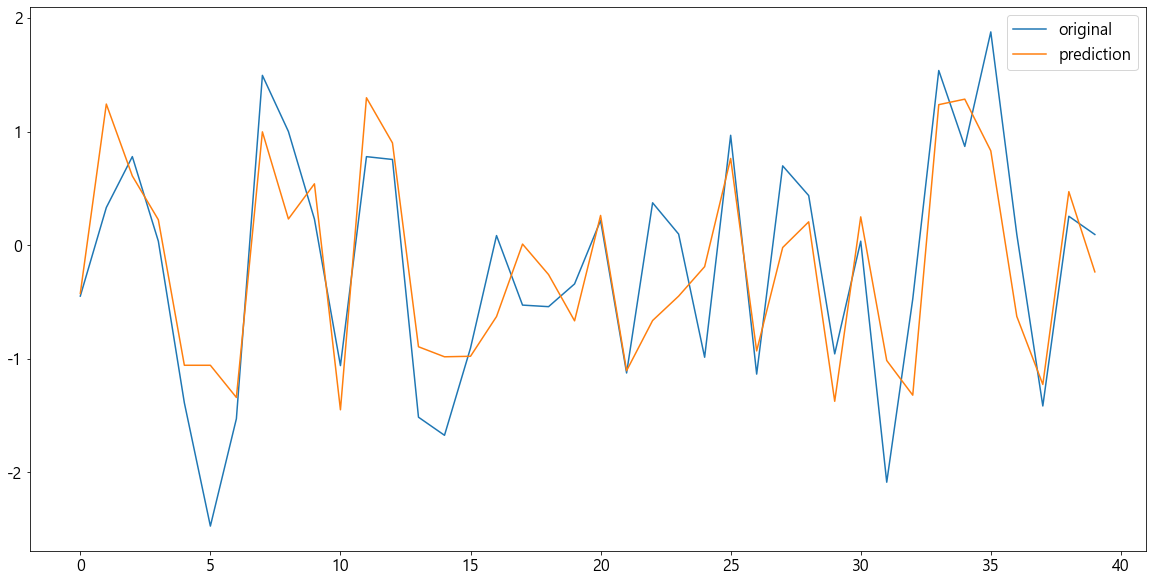

In [9]:
# 그래프를 통해 보는 것이 중요한다
plt.plot(y, label='original')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()

In [11]:
model = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
r2 = cross_val_score(model, X, y, scoring='r2', cv=kfold)

print(r1.mean())
print(r2.mean())

-0.3645458796480713
0.11328621026484162


In [12]:
s1 = ['neg_mean_squared_error', 'r2']
r1 = cross_validate(model, X, y, scoring=s1, cv=kfold)

print(r1['test_neg_mean_squared_error'].mean())
print(r1['test_r2'].mean())

-0.3645458796480713
0.11328621026484162
